In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 8)
# we use regex here to parse the output log files
import re

Populating the interactive namespace from numpy and matplotlib


# Speedups of Cifar10 on ResNet-18 with killing

Populating the interactive namespace from numpy and matplotlib


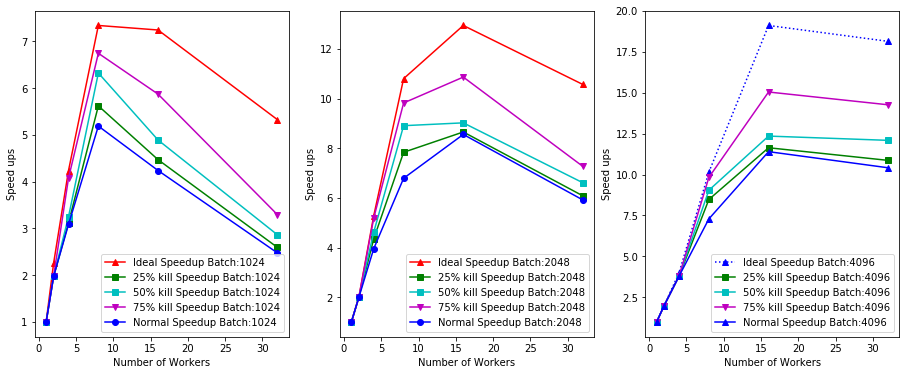

In [2]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15.5, 6)

num_worker_interval = [1, 2, 4, 8, 16 ,32]
# batch size at 1024
normal_speedup_b1k = [1, 1.9737, 3.0871, 5.1896, 4.2394, 2.4774]
speedup_b1k_25kill = [1, 1.9737, 3.1186, 5.62206, 4.47124, 2.59486]
speedup_b1k_50kill = [1, 1.9737, 3.2495, 6.32482, 4.8916, 2.86447]
speedup_b1k_75kill = [1, 1.9737, 4.07877, 6.74648, 5.87311, 3.29486]
ideal_speedup_b1k = [1, 2.2547, 4.2394, 7.3414, 7.2445, 5.3274]

# batch size at 2048
normal_speedup_b2k = [1, 1.9937, 3.9572, 6.7889, 8.5549, 5.92]
speedup_b2k_25kill = [1, 1.9937, 4.35292, 7.8361, 8.65437, 6.08509]
speedup_b2k_50kill = [1, 1.9937, 4.6249775, 8.907445, 9.02153, 6.61194]
speedup_b2k_75kill = [1, 1.9937, 5.19295, 9.82279, 10.8653, 7.273142]
ideal_speedup_b2k = [1, 2.0, 5.2857, 10.8029, 12.94468, 10.5714]

# batch size at 4096
normal_speedup_b4k = [1, 1.999, 3.799, 7.2922, 11.39739, 10.4150]
speedup_b4k_25kill = [1, 1.999, 3.799, 8.47718, 11.63605, 10.8661]
speedup_b4k_50kill = [1, 1.999, 3.799, 9.042328, 12.34794, 12.0880]
speedup_b4k_75kill = [1, 1.999, 3.799, 9.82861, 15.0389, 14.25962]
ideal_speedup_b4k = [1, 2.0, 4.0, 10.1493, 19.1011, 18.13333]

fig_2 = plt.figure()
plt.title("Speed up of PT with MPI\nCifar-10 on ResNet-18")
plt.subplot(131)
plt.plot(num_worker_interval, ideal_speedup_b1k, '-^r', label='Ideal Speedup Batch:1024')
plt.plot(num_worker_interval, speedup_b1k_25kill, '-sg', label='25% kill Speedup Batch:1024')
plt.plot(num_worker_interval, speedup_b1k_50kill, '-sc', label='50% kill Speedup Batch:1024')
plt.plot(num_worker_interval, speedup_b1k_75kill, '-vm', label='75% kill Speedup Batch:1024')
plt.plot(num_worker_interval, normal_speedup_b1k, '-ob', label='Normal Speedup Batch:1024')
plt.xlabel("Number of Workers")
plt.ylabel("Speed ups")
plt.legend()
plt.subplot(132)
plt.plot(num_worker_interval, ideal_speedup_b2k, '-^r', label='Ideal Speedup Batch:2048')
plt.plot(num_worker_interval, speedup_b2k_25kill, '-sg', label='25% kill Speedup Batch:2048')
plt.plot(num_worker_interval, speedup_b2k_50kill, '-sc', label='50% kill Speedup Batch:2048')
plt.plot(num_worker_interval, speedup_b2k_75kill, '-vm', label='75% kill Speedup Batch:2048')
plt.plot(num_worker_interval, normal_speedup_b2k, '-ob', label='Normal Speedup Batch:2048')
plt.xlabel("Number of Workers")
plt.ylabel("Speed ups")
plt.legend()
plt.subplot(133)
plt.plot(num_worker_interval, ideal_speedup_b4k, ':^b', label='Ideal Speedup Batch:4096')
plt.plot(num_worker_interval, speedup_b4k_25kill, '-sg', label='25% kill Speedup Batch:4096')
plt.plot(num_worker_interval, speedup_b4k_50kill, '-sc', label='50% kill Speedup Batch:4096')
plt.plot(num_worker_interval, speedup_b4k_75kill, '-vm', label='75% kill Speedup Batch:4096')
plt.plot(num_worker_interval, normal_speedup_b4k, '-^b', label='Normal Speedup Batch:4096')
plt.xlabel("Number of Workers")
plt.ylabel("Speed ups")
plt.legend()
#plt.savefig("straggler_ideal_speedup_comparison.jpg", dpi=300)
plt.show()

# Speedup Compared to Normal Case Batch size: 1024 case

Populating the interactive namespace from numpy and matplotlib


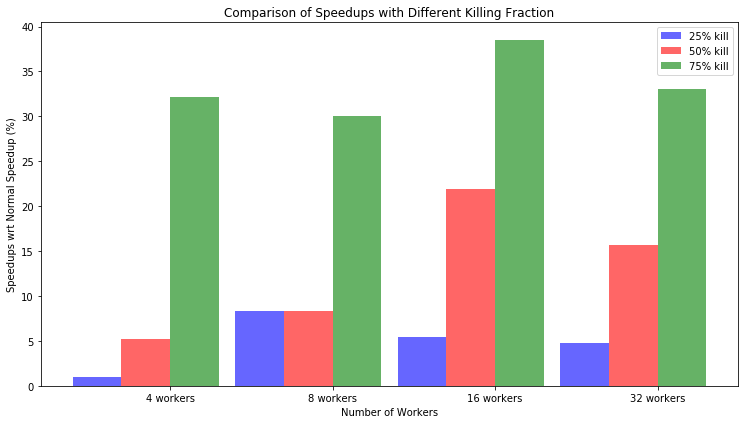

In [3]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10.5, 6)
n_groups = 4

b1k_kill25_speedup = (1.02, 8.333, 5.4686, 4.7412)
b1k_kill50_speedup = (5.2606, 8.333, 21.87, 15.624)
b1k_kill75_speedup = (32.123, 30, 38.536, 32.996)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.3

opacity = 0.6
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index- bar_width, b1k_kill25_speedup, bar_width,
                 alpha=opacity,
                 color='b',
                 label='25% kill')

rects2 = plt.bar(index, b1k_kill50_speedup, bar_width,
                 alpha=opacity,
                 color='r',
                 label='50% kill')

rects3 = plt.bar(index + bar_width, b1k_kill75_speedup, bar_width,
                 alpha=opacity,
                 color='g',
                 label='75% kill')

plt.xlabel('Number of Workers')
plt.ylabel('Speedups wrt Normal Speedup (%)')
plt.title('Comparison of Speedups with Different Killing Fraction')
plt.xticks(index + bar_width / 2, ('4 workers', '8 workers', '16 workers', '32 workers'))
plt.legend()

plt.tight_layout()
plt.show()

# Speedup Compared to Normal Case Batch size: 2048 case

Populating the interactive namespace from numpy and matplotlib


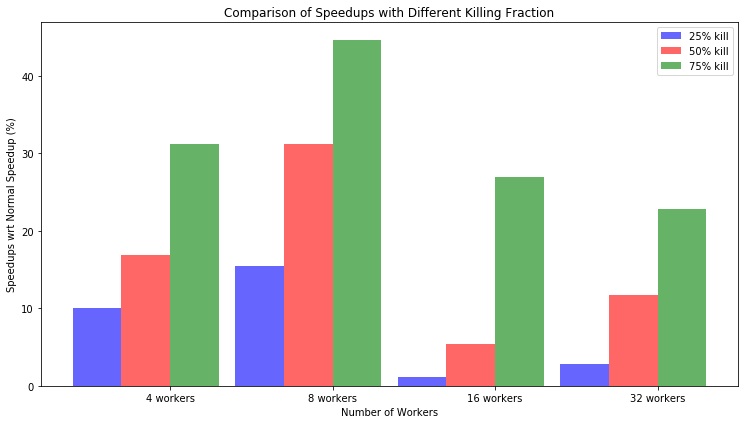

In [4]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10.5, 6)
n_groups = 4

b2k_kill25_speedup = (10, 15.4251, 1.1627, 2.78868)
b2k_kill50_speedup = (16.875, 31.206, 5.45453, 11.6881)
b2k_kill75_speedup = (31.227, 44.6889, 27.0067, 22.8571)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.3

opacity = 0.6
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index- bar_width, b2k_kill25_speedup, bar_width,
                 alpha=opacity,
                 color='b',
                 label='25% kill')

rects2 = plt.bar(index, b2k_kill50_speedup, bar_width,
                 alpha=opacity,
                 color='r',
                 label='50% kill')

rects3 = plt.bar(index + bar_width, b2k_kill75_speedup, bar_width,
                 alpha=opacity,
                 color='g',
                 label='75% kill')

plt.xlabel('Number of Workers')
plt.ylabel('Speedups wrt Normal Speedup (%)')
plt.title('Comparison of Speedups with Different Killing Fraction')
plt.xticks(index + bar_width / 2, ('4 workers', '8 workers', '16 workers', '32 workers'))
plt.legend()

plt.tight_layout()
plt.show()

# Speedup Compared to Normal Case Batch size: 4096 case

Populating the interactive namespace from numpy and matplotlib


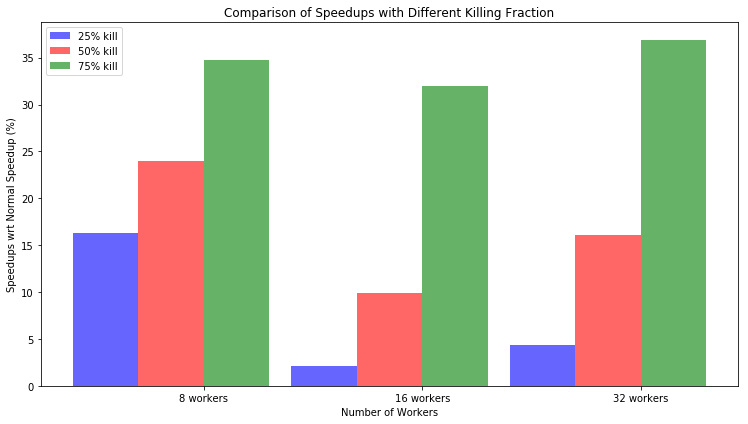

In [5]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10.5, 6)
n_groups = 3

normal_speedup_b4k = [1, 1.999, 3.799, 7.2922, 11.39739, 10.4150]
speedup_b4k_25kill = [1, 1.999, 3.799, 8.47718, 11.63605, 10.8661]
speedup_b4k_50kill = [1, 1.999, 3.799, 9.042328, 12.34794, 12.0880]
speedup_b4k_75kill = [1, 1.999, 3.799, 9.82861, 15.0389, 14.25962]

b4k_kill25_speedup = (16.2499, 2.0939, 4.3312)
b4k_kill50_speedup = (24.0, 9.905, 16.0633)
b4k_kill75_speedup = (34.7825, 31.95, 36.9142)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.3

opacity = 0.6
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index- bar_width, b4k_kill25_speedup, bar_width,
                 alpha=opacity,
                 color='b',
                 label='25% kill')

rects2 = plt.bar(index, b4k_kill50_speedup, bar_width,
                 alpha=opacity,
                 color='r',
                 label='50% kill')

rects3 = plt.bar(index + bar_width, b4k_kill75_speedup, bar_width,
                 alpha=opacity,
                 color='g',
                 label='75% kill')

plt.xlabel('Number of Workers')
plt.ylabel('Speedups wrt Normal Speedup (%)')
plt.title('Comparison of Speedups with Different Killing Fraction')
plt.xticks(index + bar_width / 2, ('8 workers', '16 workers', '32 workers'))
plt.legend()

plt.tight_layout()
plt.show()